In [17]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../../datasets/hitters.csv")

In [2]:
df.head()
df = df.dropna()

In [3]:
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,A,W,282,421,25,750.0,A


In [4]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
col = ['League', 'Division', 'NewLeague']

for labelling_col in col:
    df[labelling_col] = label_encoder.fit_transform(df[labelling_col])
df.head()    

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,1,1,632,43,10,475.0,1
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,0,1,880,82,14,480.0,0
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,1,0,200,11,3,500.0,1
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,1,0,805,40,4,91.5,1
5,-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,...,501,336,194,0,1,282,421,25,750.0,0


In [5]:
y = df['Salary']

In [6]:
X_numerical = df.drop(['Salary','Unnamed: 0'], axis=1).astype('float64')

In [7]:
list_numerical = X_numerical.columns
list_numerical

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'NewLeague'],
      dtype='object')

In [8]:
X= X_numerical.copy()

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [10]:
X_train.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
260,496.0,119.0,8.0,57.0,33.0,21.0,7.0,3358.0,882.0,36.0,365.0,280.0,165.0,1.0,1.0,155.0,371.0,29.0,1.0
92,317.0,78.0,7.0,35.0,35.0,32.0,1.0,317.0,78.0,7.0,35.0,35.0,32.0,0.0,0.0,45.0,122.0,26.0,0.0
137,343.0,103.0,6.0,48.0,36.0,40.0,15.0,4338.0,1193.0,70.0,581.0,421.0,325.0,0.0,0.0,211.0,56.0,13.0,0.0
90,314.0,83.0,13.0,39.0,46.0,16.0,5.0,1457.0,405.0,28.0,156.0,159.0,76.0,0.0,1.0,533.0,40.0,4.0,0.0
100,495.0,151.0,17.0,61.0,84.0,78.0,10.0,5624.0,1679.0,275.0,884.0,1015.0,709.0,0.0,0.0,1045.0,88.0,13.0,0.0


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[list_numerical])

X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

In [12]:
X_train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,NewLeague
260,0.644577,0.257439,-0.456963,0.101010,-0.763917,-0.975959,-0.070553,0.298535,0.239063,-0.407836,0.011298,-0.163736,-0.361084,1.021981,0.967906,-0.482387,1.746229,3.022233,1.067490
92,-0.592807,-0.671359,-0.572936,-0.778318,-0.685806,-0.458312,-1.306911,-1.001403,-0.969702,-0.746705,-0.957639,-0.898919,-0.844319,-0.978492,-1.033158,-0.851547,0.022276,2.574735,-0.936777
137,-0.413075,-0.105019,-0.688910,-0.258715,-0.646751,-0.081841,1.577925,0.717456,0.706633,-0.010542,0.645511,0.259369,0.220252,-0.978492,-1.033158,-0.294452,-0.434676,0.635577,-0.936777
90,-0.613545,-0.558091,0.122907,-0.618440,-0.256196,-1.211253,-0.482672,-0.514087,-0.478077,-0.501317,-0.602362,-0.526826,-0.684451,-0.978492,0.967906,0.786178,-0.545452,-0.706917,-0.936777
100,0.637665,0.982354,0.586803,0.260888,1.227914,1.706394,0.547626,1.267183,1.437305,2.384908,1.535171,2.041811,1.615457,-0.978492,-1.033158,2.504446,-0.213124,0.635577,-0.936777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0.824309,0.733164,0.470829,0.740521,0.954525,0.859335,-0.688732,-0.824858,-0.808834,-0.571428,-0.787341,-0.685866,-0.648118,1.021981,-1.033158,3.427344,0.326910,1.232241,1.067490
196,0.423369,0.461321,1.862516,0.500704,1.618469,0.482865,1.165805,1.354814,1.246368,1.625375,1.112362,1.516681,0.681687,-0.978492,0.967906,-1.002566,-0.822392,-1.303581,-0.936777
159,1.474109,1.254197,1.746542,1.140215,2.126191,-0.458312,-0.894792,-0.522636,-0.520174,-0.068968,-0.528958,-0.322776,-0.662651,-0.978492,0.967906,-0.633407,1.310048,0.933909,-0.936777
17,-1.470728,-1.396275,-1.152806,-1.217982,-1.740306,-1.258312,-0.482672,-0.932153,-0.933620,-0.770075,-0.869554,-0.934928,-0.818885,-0.978492,0.967906,-0.660255,0.403069,1.083075,-0.936777


In [13]:
from sklearn.linear_model import Lasso

reg = Lasso(alpha=1)
reg.fit(X_train,y_train)

,alpha,1
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [14]:
print(f"R squared training set {round(reg.score(X_train,y_train) * 100,2)}")
print(f"R squared test set {round(reg.score(X_test,y_test) * 100,2)}")

R squared training set 60.46
R squared test set 32.55


#Interpretation  
There is a significant overfit

In [15]:
from sklearn.metrics import mean_squared_error

#Training data
pred_train = reg.predict(X_train)
mse_train = mean_squared_error(y_train,pred_train)

#Test data
pred = reg.predict(X_test)
mse_test = mean_squared_error(y_test,pred)
print(f"Mean squared error training set {round(mse_train,2)}")
print(f"Mean squared error test set {round(mse_test,2)}")

Mean squared error training set 80512.09
Mean squared error test set 135335.91


#Interpr  
again low error during training and large error with unseen, clearly overfitting

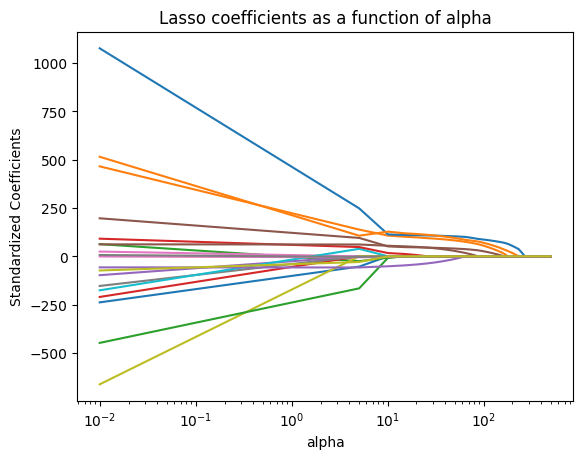

In [16]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.linspace(start=.01,stop=500,num=100)

lasso = Lasso(max_iter=10_000)
coefs = []

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)
    
ax=plt.gca()

ax.plot(alphas,coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha');

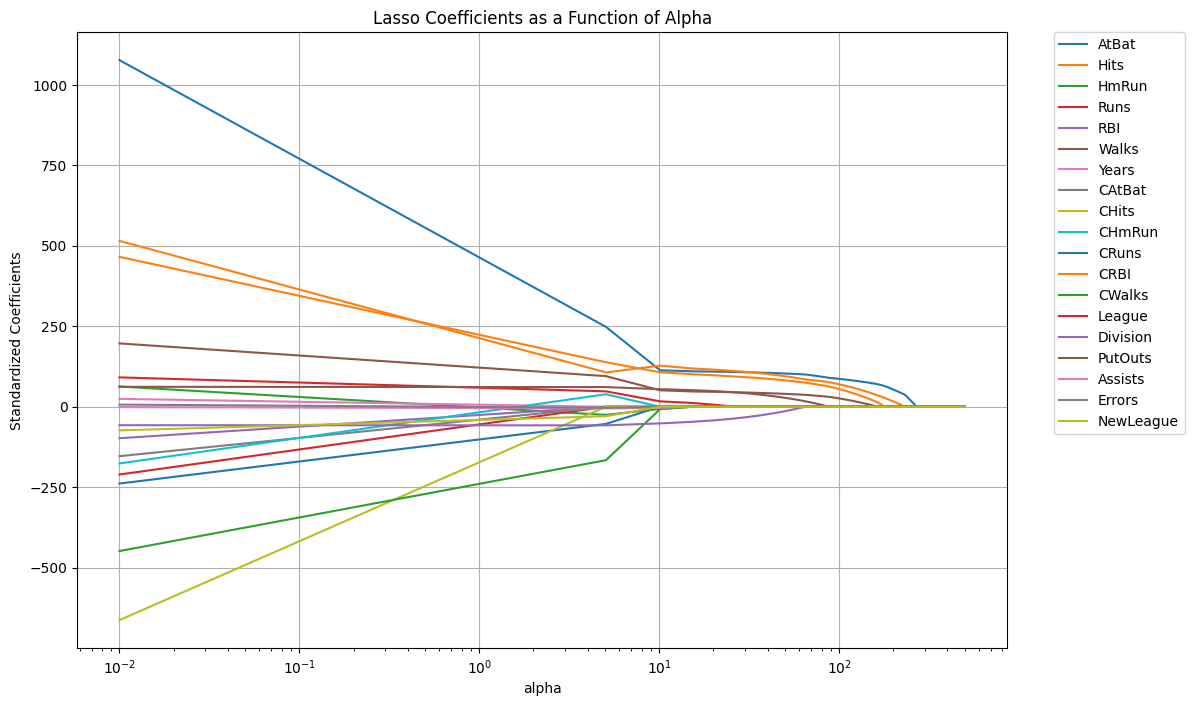

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

alphas = np.linspace(.01,500,100)
lasso = Lasso(max_iter=10_000)
coefs=[]

#Track feature names if available
feature_names = X_train.columns if hasattr(X_train,'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(X_scaled,y_train)
    coefs.append(lasso.coef_)

coefs = np.array(coefs).T


# Plotting
plt.figure(figsize=(12, 8))
ax = plt.gca()

# 1. Plot the coefficient paths and assign the labels
for idx, coef_path in enumerate(coefs):
    ax.plot(alphas, coef_path, label=feature_names[idx])

# 2. Configure the plot
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso Coefficients as a Function of Alpha')
plt.grid(True)

# 3. Add the legend OUTSIDE the plot
# The bbox_to_anchor parameter positions the legend relative to the axes
# (1.05, 1) means the upper-right corner of the legend is placed just outside 
# the upper-right corner of the plot.
# loc='upper left' sets the anchor point on the legend itself.
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.show()

In [21]:
#Interactive plot which hover 
import plotly.graph_objects as go

fig = go.Figure()

for idx, coef_path in enumerate(coefs):
    fig.add_trace(go.Scatter(
        x=alphas, y=coef_path,
        mode='lines',
        name=feature_names[idx],
        hovertemplate=f"{feature_names[idx]}<br>alpha: %{{x}}<br>coef: %{{y}}"
    ))

fig.update_layout(
    title='Lasso Coefficients vs Alpha',
    xaxis=dict(title='alpha', type='log'),
    yaxis_title='Coefficient',
    width=900, height=600
)
fig.show()


In [22]:
from sklearn.linear_model import LassoCV

model = LassoCV(cv=5, random_state=0,max_iter=10_000)
model.fit(X_train,y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,'warn'
,fit_intercept,True
,precompute,'auto'
,max_iter,10000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [23]:
model.alpha_

np.float64(2.513527859160674)

In [24]:
lass_optimum = Lasso(alpha=model.alpha_)
lass_optimum.fit(X_train,y_train)

,alpha,np.float64(2.513527859160674)
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [28]:
model_parm = list(lass_optimum.coef_)
model_parm.insert(0,lass_optimum.intercept_)
cols = X_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_parm)),columns=['Feature','Coef'])

In [30]:
lasso_coef.sort_values(by='Coef', ascending=False)

,Feature,Coef
0,AtBat,534.450739
11,CRBI,350.827151
2,HmRun,258.755287
6,Years,138.250039
10,CRuns,76.453555
14,Division,67.516430
16,Assists,64.886517
12,CWalks,62.505722
8,CHits,-0.000000
9,CHmRun,0.000000


#Inference 
features with coefficients close to zero but not exactly zero are the weakest contributors to the final model  
Errors (-1.1)  
NewLeague(-1.92)  
CAtBat(-8.68)  

There are Strongest positive predictors and Strongest negative predictors  
The dramatic positive coefficients for some features (AtBat, HmRun) and large negative coefficients for others (Hits, League) is common in models with highly collinear predictors. The model is using a combination of these correlated variables to achieve the best fit, often by assigning opposite and large weights to cancel out shared variance.





In [31]:
print(f"R squared training set, {round(lass_optimum.score(X_train,y_train) * 100,2)}")
print(f"R squared test set , {round(lass_optimum.score(X_test,y_test) * 100,2)}")

R squared training set, 59.22
R squared test set , 34.7


In [32]:
mean_squared_error(y_test,lass_optimum.predict(X_test))

131026.65591376631

#Run a chatgpt on above metrics,  
those metrics clearly are a overfit


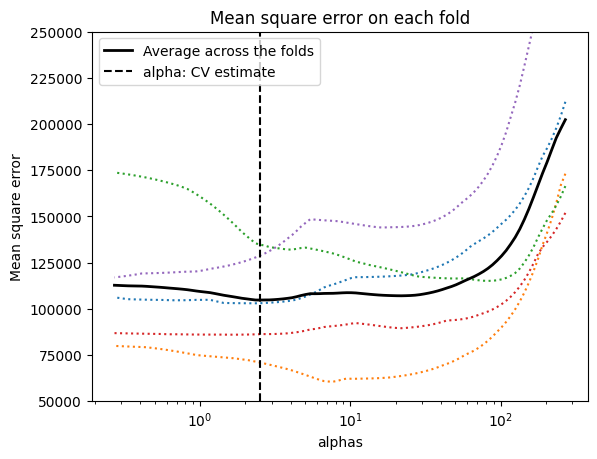

In [33]:
plt.semilogx(model.alphas_, model.mse_path_, ":")
plt.plot(
    model.alphas_ ,
    model.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    model.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight")

ymin, ymax = 50000, 250000
plt.ylim(ymin, ymax);